# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
from sklearn.utils import resample

# Loading Dataset

In [2]:
df = pd.read_csv(r'D:\Programacion\Datasets\ds_pay\ds_salaries.csv')

In [5]:
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full_Time,Principal Data Scientist,85847,ES,100,ES,Large
1,2023,Medium,Contract,ML Engineer,30000,US,100,US,Small
2,2023,Medium,Contract,ML Engineer,25500,US,100,US,Small
3,2023,Senior,Full_Time,Data Scientist,175000,CA,100,CA,Medium
4,2023,Senior,Full_Time,Data Scientist,120000,CA,100,CA,Medium
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full_Time,Data Scientist,412000,US,100,US,Large
3751,2021,Medium,Full_Time,Principal Data Scientist,151000,US,100,US,Large
3752,2020,Entry,Full_Time,Data Scientist,105000,US,100,US,Small
3753,2020,Entry,Contract,Business Data Analyst,100000,US,100,US,Large


In [3]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)
df.rename({'salary_in_usd':'salary'},axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


# Data Cleaning

In [21]:
#Invalid Values
for col in df.select_dtypes(exclude='number').columns:
    print(df[col].value_counts(),end='\n\n')

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR      

In [22]:
print(f'Min and max work year: {df.work_year.min()} - {df.work_year.max()}')

Min and max work year: 2020 - 2023


In [23]:
print(f'Min and max salary: {df.salary.min()} - {df.salary.max()}')

Min and max salary: 5132 - 450000


In [24]:
#Missing Values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.experience_level.replace({'SE':'Senior','EX':'Executive','EN':'Entry','MI':'Medium'},inplace=True)
df.employment_type.replace({'FT':'Full_Time','PT':'Part_Time','CT':'Contract','FL':'Freelancer'},inplace=True)
df.company_size.replace({'S':'Small','M':'Medium','L':'Large'},inplace=True)

# EDA

In [7]:
sns.set_style('darkgrid')

In [207]:
df.groupby('work_year')['salary'].median().tolist()

[73065.0, 80000.0, 131300.0, 143860.0]

Text(0.5, 1.0, 'Relacion Año-Salario')

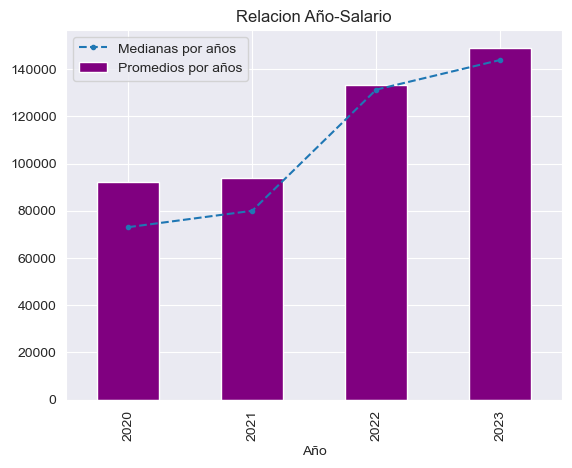

In [218]:
df.groupby('work_year')['salary'].mean().plot.bar(color='purple',label='Promedios por años')
plt.plot(df.groupby('work_year')['salary'].median().tolist(),ls='dashed',marker='.',label='Medianas por años')
plt.xlabel('Año')
plt.legend()
plt.title('Relacion Año-Salario')

Text(0.5, 0.98, 'Relaciones del Nivel de Experiencia')

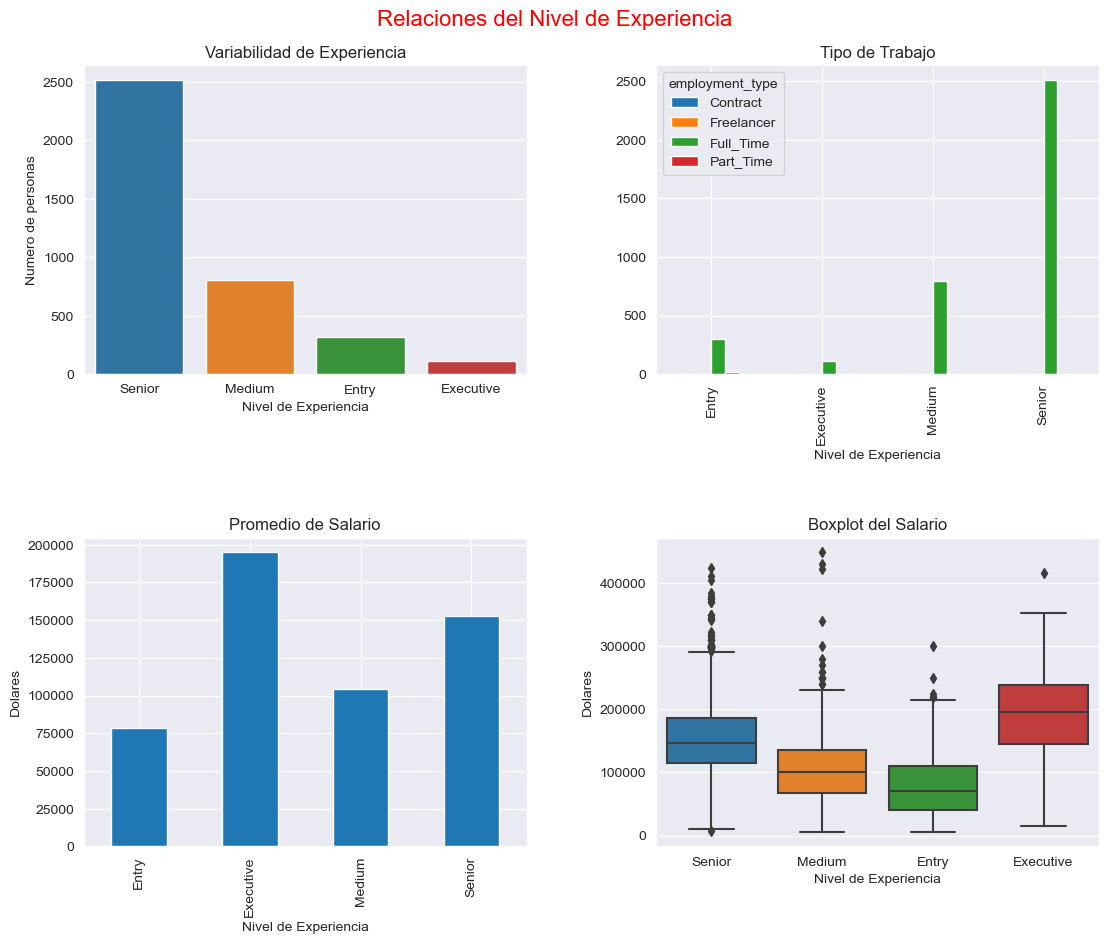

In [67]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

sns.countplot(x=df.experience_level,ax=ax[0,0])
ax[0,0].set_xlabel('Nivel de Experiencia')
ax[0,0].set_ylabel('Numero de personas')
ax[0,0].set_title('Variabilidad de Experiencia')

df.groupby('experience_level')['employment_type'].value_counts().unstack(fill_value=0).plot.bar(ax=ax[0,1])
ax[0,1].set_xlabel('Nivel de Experiencia')
ax[0,1].set_title('Tipo de Trabajo')

df.groupby('experience_level')['salary'].mean().plot.bar(ax=ax[1,0])
ax[1,0].set_xlabel('Nivel de Experiencia')
ax[1,0].set_ylabel('Dolares')
ax[1,0].set_title('Promedio de Salario')

sns.boxplot(x=df.experience_level,y=df.salary,ax=ax[1,1])
ax[1,1].set_xlabel('Nivel de Experiencia')
ax[1,1].set_ylabel('Dolares')
ax[1,1].set_title('Boxplot del Salario')

plt.tight_layout(pad=4)
fig.suptitle('Relaciones del Nivel de Experiencia',size=16,color='red')

Text(0.5, 1.0, 'Tamaño de la Empresa en la que trabajan')

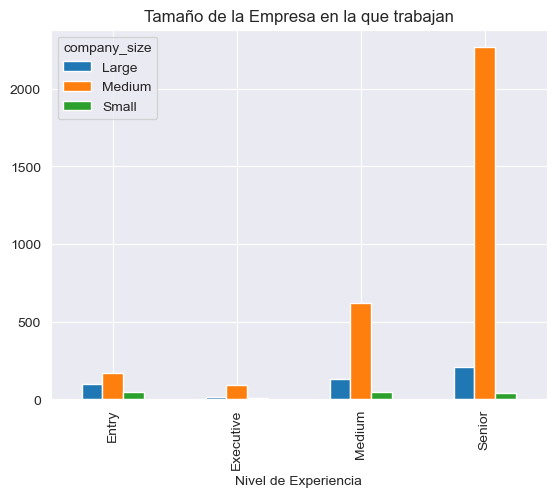

In [18]:
df.groupby('experience_level')['company_size'].value_counts().unstack(fill_value=0).plot.bar()
plt.xlabel('Nivel de Experiencia')
plt.title('Tamaño de la Empresa en la que trabajan')

Text(0.5, 1.0, 'Variacion de los Tipos de Trabajo')

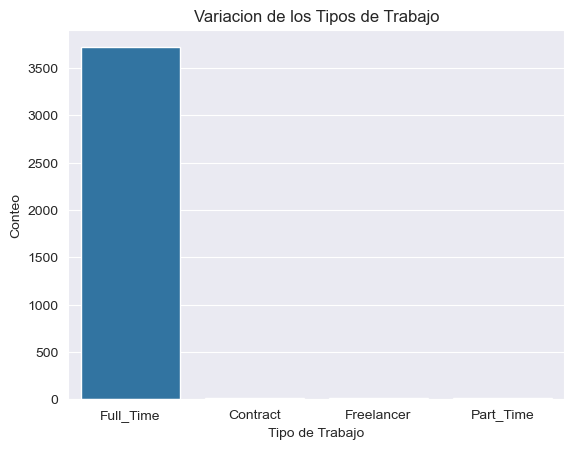

In [69]:
sns.countplot(x=df.employment_type)
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Conteo')
plt.title('Variacion de los Tipos de Trabajo')

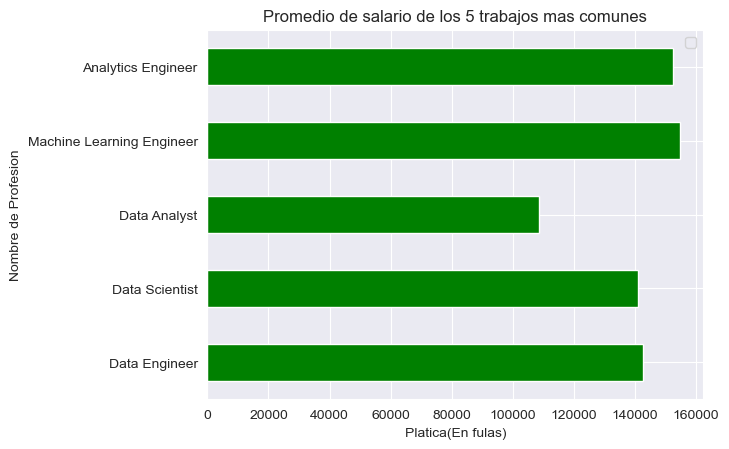

In [66]:
df.job_title.value_counts().head(5).reset_index().merge(df.groupby('job_title')['salary'].mean().reset_index(),on='job_title').drop('count',axis=1).plot.barh(x='job_title',
                                                                                                                                                              color='green',
                                                                                                                                                              ylabel='Nombre de Profesion',
                                                                                                                                                              xlabel='Platica(En fulas)',
                                                                                                                                                              title='Promedio de salario de los 5 trabajos mas comunes')
plt.legend('')



In [80]:
min,max,mean,med = df.salary.min(),df.salary.max(),df.salary.mean(),df.salary.median()

Text(0.5, 1.0, 'Boxplot del Salario')

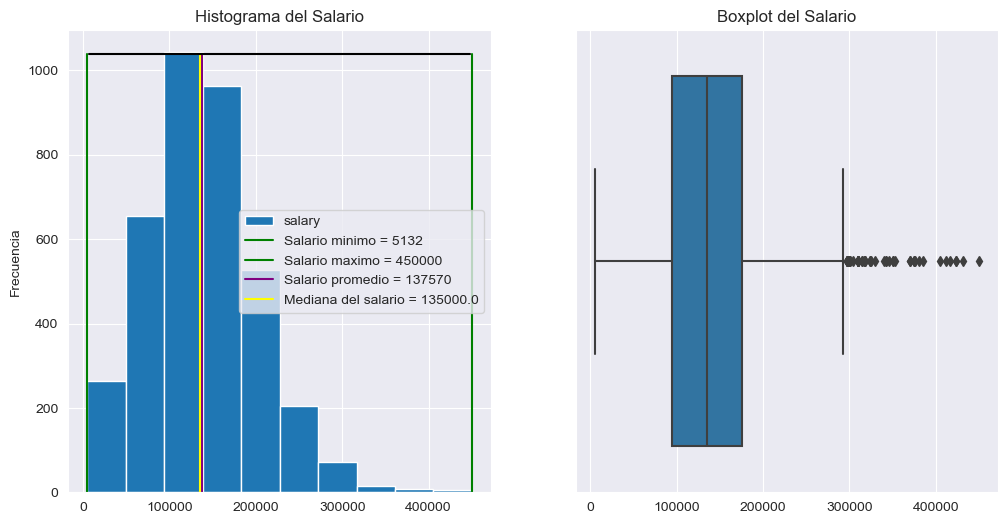

In [110]:
fig0, ax0= plt.subplots(1,2,figsize=(12,6))

df.salary.plot.hist(ylabel='Frecuencia',
                   title='Histograma del Salario',
                   ax=ax0[0])
ax0[0].axvline(x=min,color='green',ymax=0.9497,label=f'Salario minimo = {min}')
ax0[0].axvline(x=max,color='green',ymax=0.9497,label=f'Salario maximo = {max}')
ax0[0].axvline(x=mean,color='purple',ymax=0.9497,label=f'Salario promedio = {int(mean)}')
ax0[0].axvline(x=med,color='yellow',ymax=0.9497,label=f'Mediana del salario = {med}')
ax0[0].axhline(y=1040,xmin=0.05,xmax=0.95,color='black')
ax0[0].legend()

sns.boxplot(x=df.salary,ax=ax0[1])
ax0[1].set_xlabel('')
ax0[1].set_title('Boxplot del Salario')

C:\Users\Mina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Violin Plot del salario')

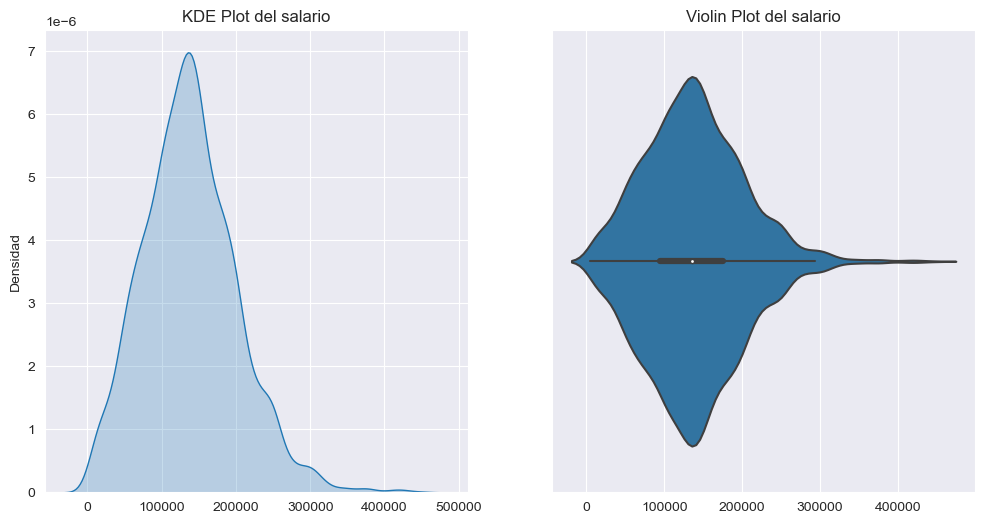

In [119]:
fig1, ax1= plt.subplots(1,2,figsize=(12,6))

sns.kdeplot(x=df.salary,fill=True,ax=ax1[0])
ax1[0].set_ylabel('Densidad')
ax1[0].set_xlabel('')
ax1[0].set_title('KDE Plot del salario')

sns.violinplot(x=df.salary,ax=ax1[1])
ax1[1].set_xlabel('')
ax1[1].set_title('Violin Plot del salario')

In [139]:
medianas = np.array([resample(df.salary).median() for x in range(100)])

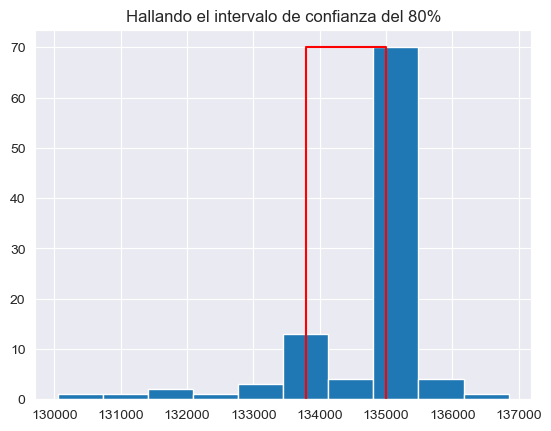

In [186]:
plt.hist(x=medianas)
plt.title('Hallando el intervalo de confianza del 80%')
plt.axvline(x=np.quantile(medianas,0.10),ymax=0.95,color='red')
plt.axvline(x=np.quantile(medianas,0.90),ymax=0.95,color='red')
plt.axhline(y=70,xmin=0.5457,xmax=0.7082,color='red')

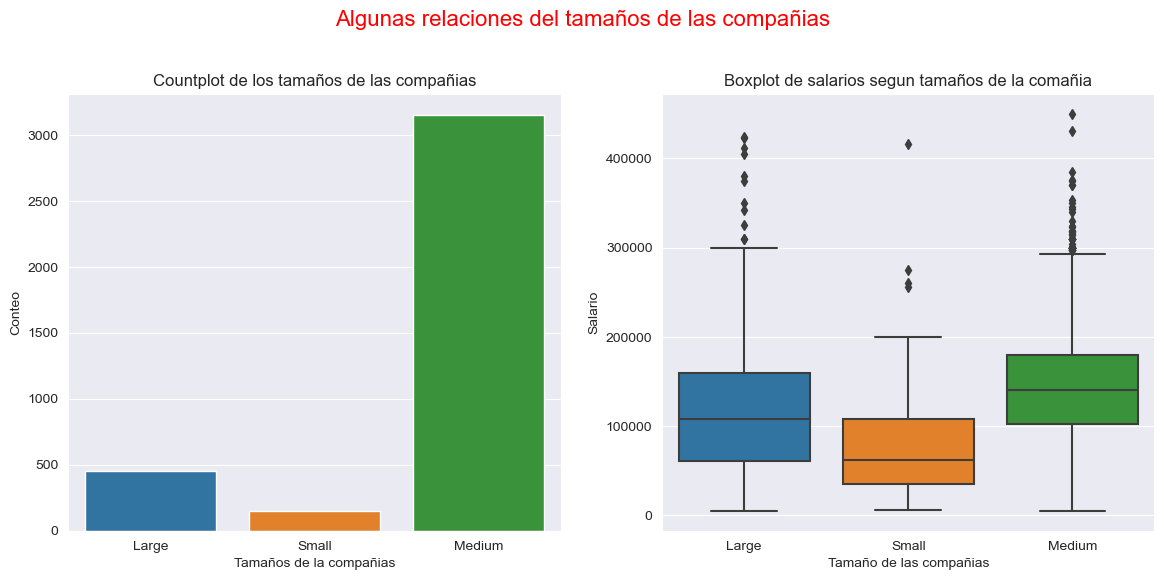

In [199]:
fig2, ax2= plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=df.company_size,ax=ax2[0])
ax2[0].set_xlabel('Tamaños de la compañias')
ax2[0].set_ylabel('Conteo')
ax2[0].set_title('Countplot de los tamaños de las compañias')

sns.boxplot(x=df.company_size,y=df.salary,ax=ax2[1])
ax2[1].set_ylabel('Salario')
ax2[1].set_xlabel('Tamaño de las compañias')
ax2[1].set_title('Boxplot de salarios segun tamaños de la comañia')

fig2.suptitle('Algunas relaciones del tamaños de las compañias',color='red',size=16)
plt.tight_layout(pad=2)